In [1]:
import numpy
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.recurrent import GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import aux_func as f


Using Theano backend.


In [28]:
feature_dim = 6
look_back = 0
data_file = 'abelha-normalizado.csv'
data_use_percent = 1
#row , col, square
net_arc = "square"

# fix random seed for reproducibility
#numpy.random.seed(7)

# load the dataset
dataframe = pandas.read_csv(data_file, engine='python')

In [29]:

dataset = dataframe.values
#resizing dataset len for faster tests 
dataset = dataset[:int(len(dataset)*data_use_percent)]
dataset = dataset.astype('float32')

In [30]:
dataframe.head(5)

,hora,temp,press,ventvel,rad,chuva,act
0,0.000000,0.026549,0.585714,0.0,0.000000,0.0,0.009357
1,0.043478,0.017699,0.500000,0.0,0.000000,0.0,0.011391
2,0.086957,0.026549,0.514286,0.0,0.000000,0.0,0.037429
3,0.130435,0.000000,0.514286,0.0,0.000000,0.0,0.065500
4,0.173913,0.026549,0.557143,0.0,0.011469,0.0,0.112286


 Train Score: 0.063940 RMSE
 Test Score: 0.098240 RMSE


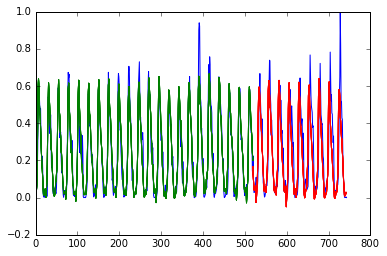

In [31]:
# split into train and test sets
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


trainX, trainY = f.create_dataset(train, feature_dim, look_back)
testX, testY = f.create_dataset(test, feature_dim, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the GRU network
model = f.baseline_model(feature_dim + look_back)
model.fit(trainX, trainY, nb_epoch=500, verbose=0)


trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print(' Train Score: %.6f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print(' Test Score: %.6f RMSE' % (testScore))
f.g_plot(dataset,trainPredict, testPredict, feature_dim, look_back)


In [9]:
testX[0]

array([[  1.60000000e+01,   2.82999992e+01,   1.00800000e+03,
          8.00000012e-01,   1.16599998e+01,   0.00000000e+00]], dtype=float32)

<h1>Agora vou normalizar</h1>

In [47]:
dataframe.head(5)

,hora,temp,press,ventvel,rad,chuva,act
0,0,22.9,1010.1,0.0,-3.54,0.0,0.023
1,1,22.8,1009.5,0.0,-3.54,0.0,0.028
2,2,22.9,1009.6,0.0,-3.54,0.0,0.092
3,3,22.6,1009.6,0.0,-3.54,0.0,0.161
4,4,22.9,1009.9,0.0,33.98,0.0,0.276


In [41]:
old_act = dataframe['act']

In [42]:
#old_act

In [44]:
dataframe2 = (dataframe - dataframe.min())/(dataframe.max() - dataframe.min())

dataframe2['act'] = old_act

Normalização feita somente nos dados climáticos. Mantendo o target 

In [46]:
dataframe2.head(5)

,hora,temp,press,ventvel,rad,chuva,act
0,0.000000,0.026549,0.585714,0.0,0.000000,0.0,0.023
1,0.043478,0.017699,0.500000,0.0,0.000000,0.0,0.028
2,0.086957,0.026549,0.514286,0.0,0.000000,0.0,0.092
3,0.130435,0.000000,0.514286,0.0,0.000000,0.0,0.161
4,0.173913,0.026549,0.557143,0.0,0.011469,0.0,0.276


In [48]:
dataset2 = dataframe2.values
#resizing dataset len for faster tests 
dataset2 = dataset2[:int(len(dataset2)*data_use_percent)]
dataset2 = dataset2.astype('float32')

# split into train and test sets
train_size = int(len(dataset2) * 0.70)
test_size = len(dataset2) - train_size
train, test = dataset2[0:train_size,:], dataset2[train_size:len(dataset),:]


trainX, trainY = f.create_dataset(train, feature_dim, look_back)
testX, testY = f.create_dataset(test, feature_dim, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = f.baseline_model(feature_dim + look_back)
model.fit(trainX, trainY, nb_epoch=500, verbose=0)

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print(' Train Score: %.6f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print(' Test Score: %.6f RMSE' % (testScore))

 Train Score: 0.169619 RMSE
 Test Score: 0.241882 RMSE


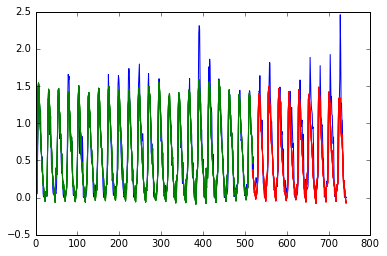

In [49]:
f.g_plot(dataset2,trainPredict, testPredict, feature_dim, look_back)

Ficou bem diferente normalizado...

<h1>Tirando hora, vent e chuva</h1>

In [19]:
dataframe.head(5)

,hora,temp,press,ventvel,rad,chuva,act
0,0,22.9,1010.1,0.0,-3.54,0.0,0.023
1,1,22.8,1009.5,0.0,-3.54,0.0,0.028
2,2,22.9,1009.6,0.0,-3.54,0.0,0.092
3,3,22.6,1009.6,0.0,-3.54,0.0,0.161
4,4,22.9,1009.9,0.0,33.98,0.0,0.276


In [20]:
dataframe = dataframe.drop('hora',1)
dataframe = dataframe.drop('chuva',1)
dataframe = dataframe.drop('ventvel',1)

feature_dim -= 3

In [21]:
dataframe.head(5)

,temp,press,rad,act
0,22.9,1010.1,-3.54,0.023
1,22.8,1009.5,-3.54,0.028
2,22.9,1009.6,-3.54,0.092
3,22.6,1009.6,-3.54,0.161
4,22.9,1009.9,33.98,0.276


 Train Score: 0.300585 RMSE
 Test Score: 0.287731 RMSE


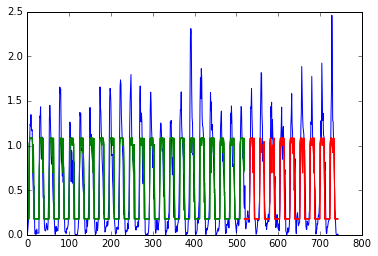

In [22]:
dataset = dataframe.values
#resizing dataset len for faster tests 
dataset = dataset[:int(len(dataset)*data_use_percent)]
dataset = dataset.astype('float32')

# split into train and test sets
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


trainX, trainY = f.create_dataset(train, feature_dim, look_back)
testX, testY = f.create_dataset(test, feature_dim, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the GRU network
model = f.baseline_model(feature_dim + look_back)
model.fit(trainX, trainY, nb_epoch=500, verbose=0)


trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print(' Train Score: %.6f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print(' Test Score: %.6f RMSE' % (testScore))
f.g_plot(dataset,trainPredict, testPredict, feature_dim, look_back)

<h2>Normalizando:</h2>

In [23]:
old_act = dataframe['act']
dataframe2 = (dataframe - dataframe.min())/(dataframe.max() - dataframe.min())
dataframe2['act'] = old_act
dataframe2.head(5)

,temp,press,rad,act
0,0.026549,0.585714,0.000000,0.023
1,0.017699,0.500000,0.000000,0.028
2,0.026549,0.514286,0.000000,0.092
3,0.000000,0.514286,0.000000,0.161
4,0.026549,0.557143,0.011469,0.276


In [24]:
dataset2 = dataframe2.values
#resizing dataset len for faster tests 
dataset2 = dataset2[:int(len(dataset2)*data_use_percent)]
dataset2 = dataset2.astype('float32')

# split into train and test sets
train_size = int(len(dataset2) * 0.70)
test_size = len(dataset2) - train_size
train, test = dataset2[0:train_size,:], dataset2[train_size:len(dataset2),:]


trainX, trainY = f.create_dataset(train, feature_dim, look_back)
testX, testY = f.create_dataset(test, feature_dim, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = f.baseline_model(feature_dim + look_back)
model.fit(trainX, trainY, nb_epoch=500, verbose=0)

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print(' Train Score: %.6f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print(' Test Score: %.6f RMSE' % (testScore))

 Train Score: 0.208143 RMSE
 Test Score: 0.263885 RMSE


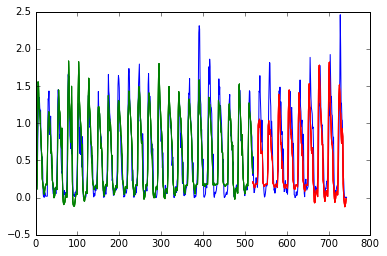

In [25]:
f.g_plot(dataset,trainPredict, testPredict, feature_dim, look_back)